In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("/content/india_weather_rainfall_data.xlsx")

In [3]:
df

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
0,2021-01-02,January,Winter,Gulmarg,JK,Baramulla,-2.2,-6.6,-0.8,2.2,1020.0,2652,34.0500,74.4000,0.1
1,2021-01-03,January,Winter,Gulmarg,JK,Baramulla,-3.6,-4.6,-1.8,3.7,1019.5,2652,34.0500,74.4000,4.4
2,2021-01-04,January,Winter,Gulmarg,JK,Baramulla,-3.0,-4.5,-1.1,2.1,1022.0,2652,34.0500,74.4000,2.3
3,2021-01-05,January,Winter,Gulmarg,JK,Baramulla,-3.3,-5.1,-1.2,2.8,1015.6,2652,34.0500,74.4000,35.0
4,2021-01-06,January,Winter,Gulmarg,JK,Baramulla,-3.9,-8.3,-1.0,3.4,1015.3,2652,34.0500,74.4000,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970334,2025-02-06,February,Winter,Vizagapatam / Gajuwaka,AP,Visakhapatnam,27.3,22.0,34.0,7.6,1011.4,5,17.7167,83.2333,0.0
970335,2025-02-07,February,Winter,Vizagapatam / Gajuwaka,AP,Visakhapatnam,26.7,23.0,30.0,7.7,1013.1,5,17.7167,83.2333,0.3
970336,2025-02-08,February,Winter,Vizagapatam / Gajuwaka,AP,Visakhapatnam,26.5,23.0,30.0,8.7,1013.0,5,17.7167,83.2333,0.0
970337,2025-02-09,February,Winter,Vizagapatam / Gajuwaka,AP,Visakhapatnam,26.5,23.0,30.0,8.5,1012.8,5,17.7167,83.2333,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970339 entries, 0 to 970338
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_of_record  970339 non-null  datetime64[ns]
 1   month           970339 non-null  object        
 2   season          970339 non-null  object        
 3   station_name    970339 non-null  object        
 4   state           970339 non-null  object        
 5   district        970339 non-null  object        
 6   avg_temp        970339 non-null  float64       
 7   min_temp        926441 non-null  float64       
 8   max_temp        859741 non-null  float64       
 9   wind_speed      695895 non-null  float64       
 10  air_pressure    665675 non-null  float64       
 11  elevation       970339 non-null  int64         
 12  latitude        970339 non-null  float64       
 13  longitude       970339 non-null  float64       
 14  rainfall        712785 non-null  flo

In [5]:
df.shape

(970339, 15)

In [6]:
df.describe(include=object)

,month,season,station_name,state,district
count,970339,970339,970339,970339,970339
unique,12,4,406,32,314
top,January,Winter,Thiruvananthapuram,MH,Visakhapatnam
freq,92905,333244,7388,98770,13400


In [7]:
df.describe(include=float)

,avg_temp,min_temp,max_temp,wind_speed,air_pressure,latitude,longitude,rainfall
count,970339.000000,926441.000000,859741.000000,695895.000000,665675.000000,970339.000000,970339.000000,712785.000000
mean,25.661709,20.647342,31.195383,9.432732,1009.437663,20.793670,79.426826,5.267533
std,5.438133,6.008171,5.464499,4.979263,5.292871,6.328275,5.852512,14.444142
min,-10.400000,-18.500000,-5.600000,0.000000,922.600000,7.983300,68.850000,0.000000
25%,23.100000,17.100000,28.500000,6.100000,1005.800000,15.850000,75.400000,0.000000
50%,26.700000,22.400000,31.600000,8.400000,1009.800000,21.616700,78.066700,0.000000
75%,29.100000,25.000000,34.400000,11.600000,1013.300000,25.566700,82.716700,4.000000
max,43.400000,36.600000,87.000000,66.600000,1036.500000,34.083300,95.383300,485.900000


In [8]:
df.isnull().sum()

,0
date_of_record,0
month,0
season,0
station_name,0
state,0
district,0
avg_temp,0
min_temp,43898
max_temp,110598
wind_speed,274444


In [9]:
df = df.sort_values("date_of_record")

# Station-wise fill
cols = ["min_temp", "max_temp", "wind_speed", "air_pressure", "rainfall"]

for col in cols:
    df[col] = df.groupby("station_name")[col].transform(
                lambda x: x.fillna(x.mean())
              )

# Forward fill remaining
df[cols] = df[cols].fillna(method="ffill")

/tmp/ipython-input-1929039668.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols] = df[cols].fillna(method="ffill")


In [10]:
df.isnull().sum()

,0
date_of_record,0
month,0
season,0
station_name,0
state,0
district,0
avg_temp,0
min_temp,0
max_temp,0
wind_speed,0


In [11]:
df.columns

Index(['date_of_record', 'month', 'season', 'station_name', 'state',
       'district', 'avg_temp', 'min_temp', 'max_temp', 'wind_speed',
       'air_pressure', 'elevation', 'latitude', 'longitude', 'rainfall'],
      dtype='object')

Mean Temperature

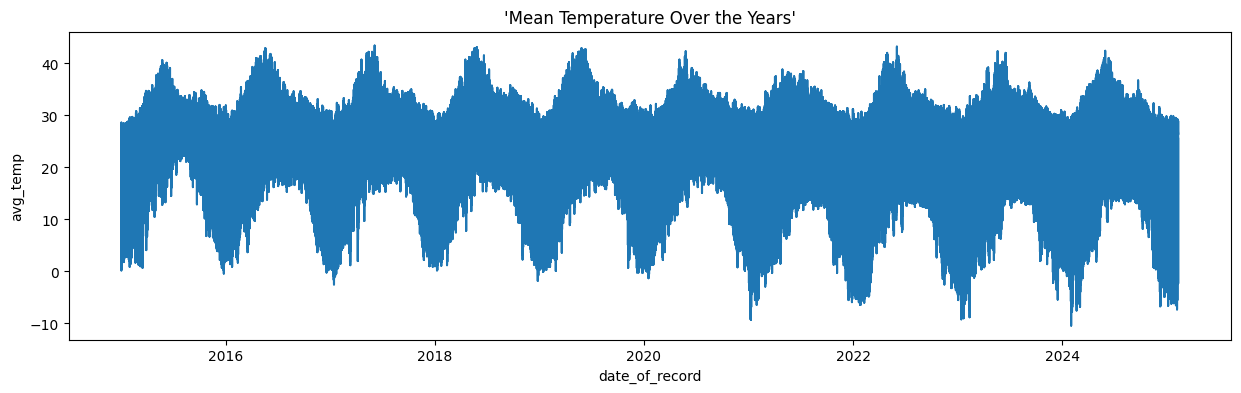

In [12]:
plt.figure(figsize=(15,4))
x=df['date_of_record']
y=df['avg_temp']
plt.plot(x,y)
plt.xlabel("date_of_record")
plt.ylabel("avg_temp")
plt.title("'Mean Temperature Over the Years'")
plt.show()

# ---------------------------------------
# 1. TEMPERATURE INSIGHTS
# ---------------------------------------

# i Hottest & Coldest Days

In [13]:
print("🔥 Hottest Days:")
print(df.nlargest(5, 'avg_temp')[['date_of_record','station_name','district','avg_temp']])

print("\n❄ Coldest Days:")
print(df.nsmallest(5, 'avg_temp')[['date_of_record','station_name','district','avg_temp']])


🔥 Hottest Days:
       date_of_record station_name    district  avg_temp
222145     2017-06-04        Datia       Datia      43.4
225296     2017-06-04       Jhansi      Jhansi      43.3
573678     2022-06-03   Chandrapur  Chandrapur      43.2
222443     2018-05-27        Datia       Datia      43.1
225594     2018-05-27       Jhansi      Jhansi      43.0

❄ Coldest Days:
     date_of_record station_name   district  avg_temp
1124     2024-02-02      Gulmarg  Baramulla     -10.4
7        2021-01-09      Gulmarg  Baramulla      -9.3
6        2021-01-08      Gulmarg  Baramulla      -9.2
740      2023-01-14      Gulmarg  Baramulla      -9.2
748      2023-01-22      Gulmarg  Baramulla      -9.0


# ii Average Temperature Trend

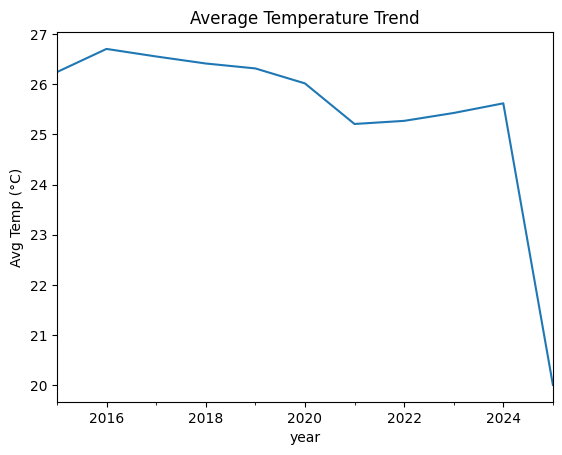

In [26]:
df['year'] = df['date_of_record'].dt.to_period('Y')

yearly_temp = df.groupby('year')['avg_temp'].mean()

yearly_temp.plot(kind='line')
plt.title("Average Temperature Trend")
plt.ylabel("Avg Temp (°C)")
plt.show()

# iii Seasonal Temperature Variation

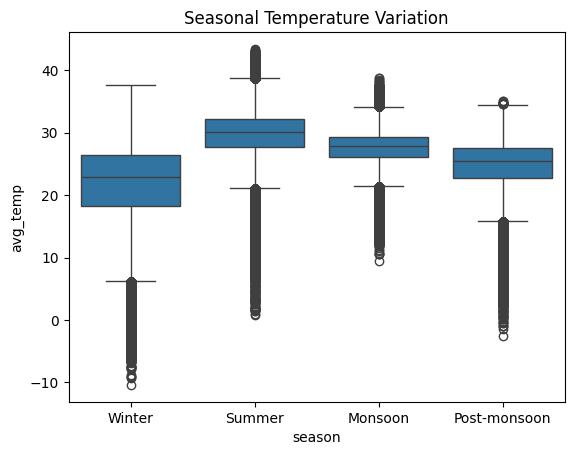

In [27]:
sns.boxplot(data=df, x='season', y='avg_temp')
plt.title("Seasonal Temperature Variation")
plt.show()


# iv Heatwave Detection (3+ days > 40°C)

In [28]:
df['heatwave'] = df['avg_temp'] > 40

df['hw_group'] = (df['heatwave'] != df['heatwave'].shift()).cumsum()
heatwaves = df[df['heatwave']].groupby('hw_group')['date_of_record'].agg(['min','max','count'])

heatwaves = heatwaves[heatwaves['count'] >= 3]
print("🔥 Heatwave Periods (3+ days > 40°C):")
print(heatwaves)

🔥 Heatwave Periods (3+ days > 40°C):
                min        max  count
hw_group                             
16       2016-05-01 2016-05-01      3


# v Temperature Difference (Daily Variability)

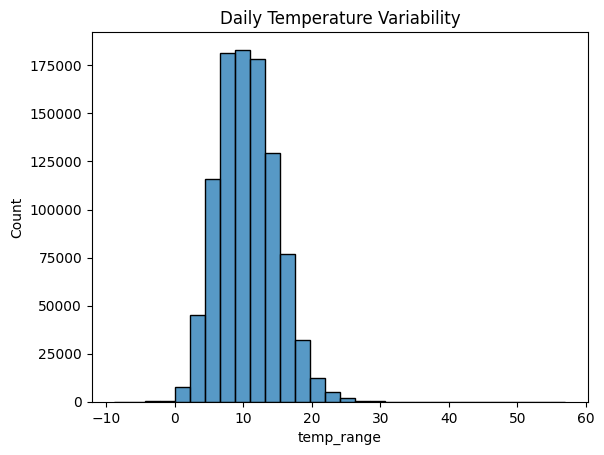

In [29]:
df['temp_range'] = df['max_temp'] - df['min_temp']
sns.histplot(df['temp_range'], bins=30)
plt.title("Daily Temperature Variability")
plt.show()

# ---------------------------------------
# 2. RAINFALL INSIGHTS
# ---------------------------------------

# i Monthly Rainfall

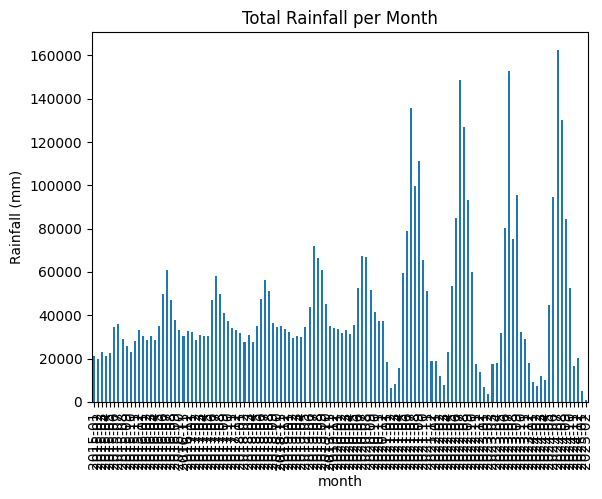

In [30]:
monthly_rain = df.groupby('month')['rainfall'].sum()
monthly_rain.plot(kind='bar')
plt.title("Total Rainfall per Month")
plt.ylabel("Rainfall (mm)")
plt.show()

# ii Seasonal Rainfall

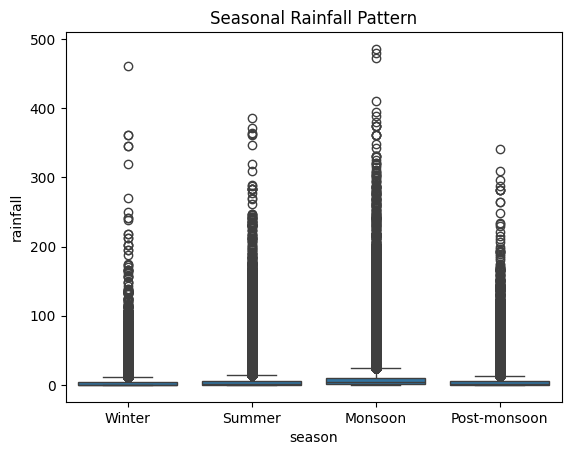

In [31]:
sns.boxplot(data=df, x='season', y='rainfall')
plt.title("Seasonal Rainfall Pattern")
plt.show()

# iii Top Rainfall Districts

In [32]:
print(df.groupby('district')['rainfall'].sum().sort_values(ascending=False).head(10))

district
Uttara Kannada      162181.910408
Dakshina Kannada    108656.371429
Ratnagiri           102853.732198
Mumbai Suburban      97010.760107
South Goa            91072.625222
Kozhikode            85918.804173
Satara               83282.694853
South Andaman        82357.552187
Malappuram           72029.785503
Dhubri               67239.268907
Name: rainfall, dtype: float64


# iv Rainfall vs Temperature / Pressure

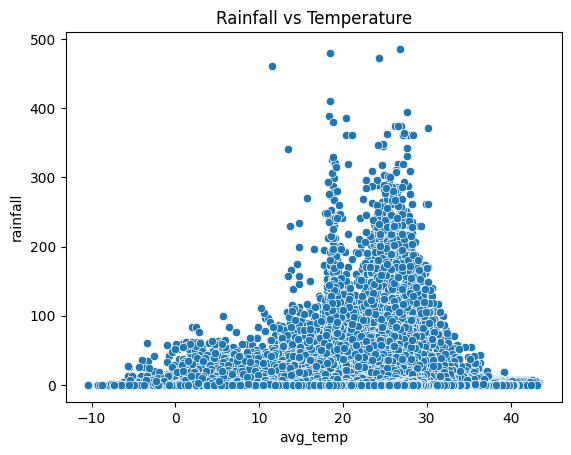

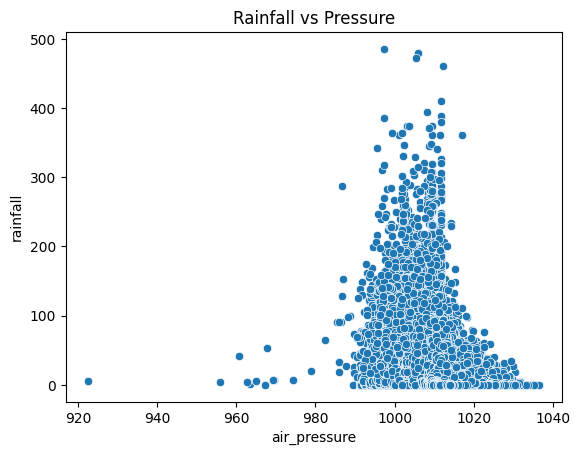

In [33]:
sns.scatterplot(data=df, x='avg_temp', y='rainfall')
plt.title("Rainfall vs Temperature")
plt.show()

sns.scatterplot(data=df, x='air_pressure', y='rainfall')
plt.title("Rainfall vs Pressure")
plt.show()

# ---------------------------------------
# 3. WIND INSIGHTS
# ---------------------------------------

# i Windiest Stations

In [36]:
print(df.groupby('station_name')['wind_speed'].mean().sort_values(ascending=False).head(10))

station_name
Kanniyakumari                      20.557297
Pamban                             19.493948
T.B.I.A                            19.338012
New Kandla                         19.143989
Diu                                18.994224
Daman / Dam?n                      18.259502
Daman                              18.259502
M.O. Agathi Airport / Kavaratti    18.156443
Car Nicobar                        18.049731
Nancowry                           17.997646
Name: wind_speed, dtype: float64


# ii Wind Speed by Season

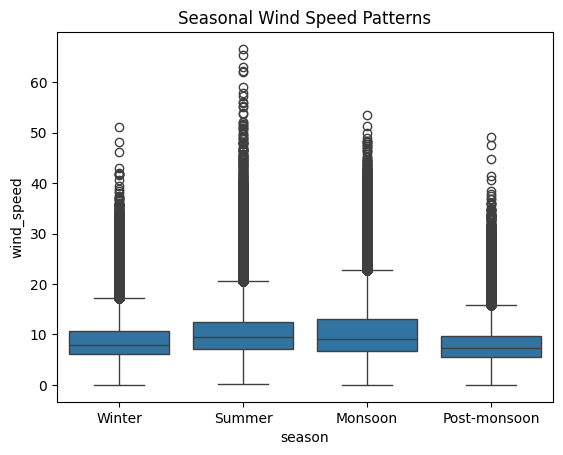

In [37]:
sns.boxplot(data=df, x='season', y='wind_speed')
plt.title("Seasonal Wind Speed Patterns")
plt.show()

# iii Wind vs Rainfall

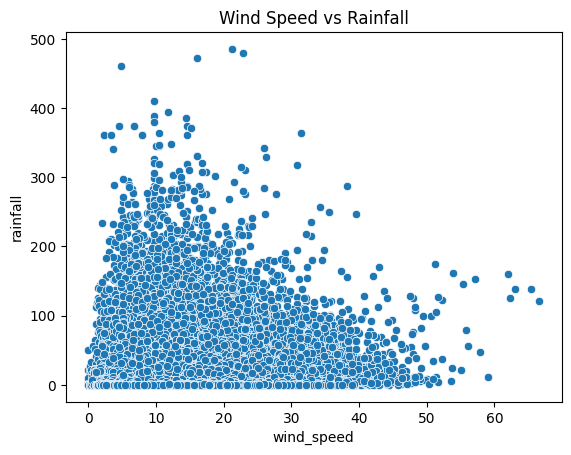

In [40]:
sns.scatterplot(data=df, x='wind_speed', y='rainfall')
plt.title("Wind Speed vs Rainfall")
plt.show()

# ---------------------------------------
# 4. AIR PRESSURE INSIGHTS
# ---------------------------------------

# i Lowest Pressure Zones

In [41]:
print(df.nsmallest(10, 'air_pressure')[['date_of_record','station_name','district','air_pressure']])

       date_of_record          station_name            district  air_pressure
465364     2017-07-31  Nagpur Mayo Hospital              Nagpur         922.6
469054     2017-07-31       Nagpur Sonegaon              Nagpur         922.6
145533     2018-06-24     Jaipur / Sanganer              Jaipur         955.9
159624     2018-08-13      Lucknow / Amausi             Lucknow         960.8
155932     2018-08-13               Lucknow             Lucknow         960.8
145493     2018-05-15     Jaipur / Sanganer              Jaipur         962.7
897201     2015-10-20    Thiruvananthapuram  Thiruvananthapuram         963.4
900895     2015-10-20    Thiruvananthapuram  Thiruvananthapuram         963.4
469053     2017-07-30       Nagpur Sonegaon              Nagpur         965.0
465363     2017-07-30  Nagpur Mayo Hospital              Nagpur         965.0


# ii Pressure vs Rainfall

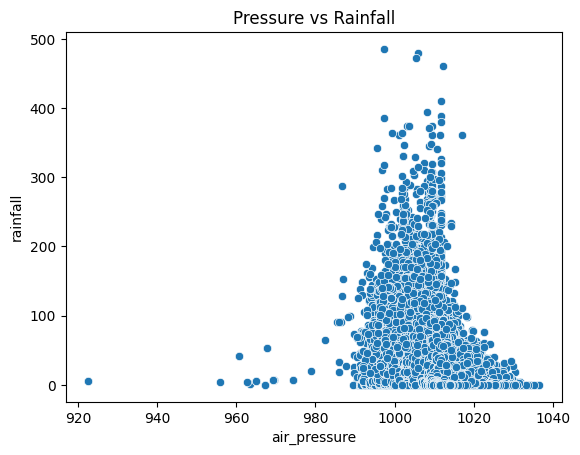

In [42]:
sns.scatterplot(data=df, x='air_pressure', y='rainfall')
plt.title("Pressure vs Rainfall")
plt.show()

# ---------------------------------------
# 5. GEOGRAPHIC INSIGHTS
# ---------------------------------------

# i Elevation vs Temperature

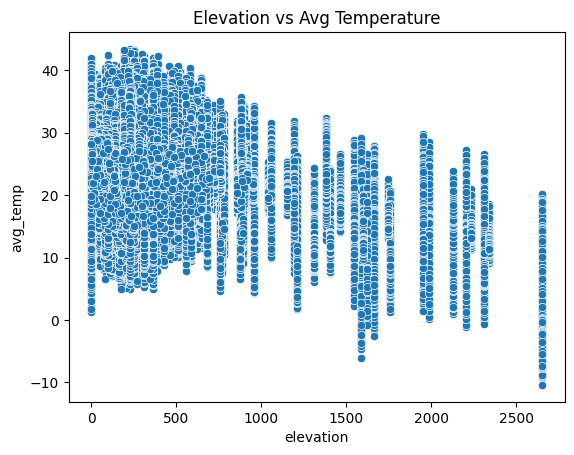

In [43]:
sns.scatterplot(data=df, x='elevation', y='avg_temp')
plt.title("Elevation vs Avg Temperature")
plt.show()


# ii State-wise Average Temperature

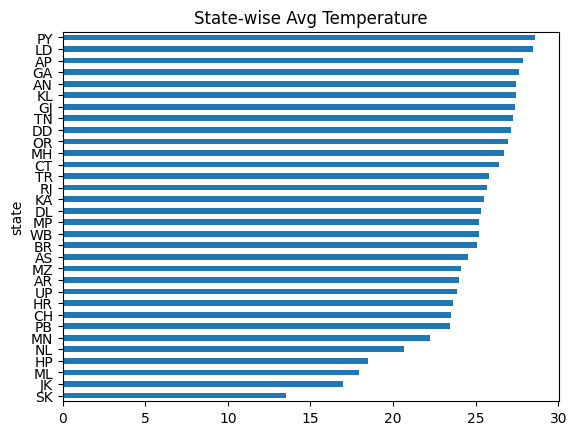

In [44]:
state_temp = df.groupby('state')['avg_temp'].mean().sort_values()
state_temp.plot(kind='barh')
plt.title("State-wise Avg Temperature")
plt.show()

# ---------------------------------------
# 6. SEASONAL INSIGHTS
# ---------------------------------------

# i Seasonal Temperature Mean

In [45]:
print(df.groupby('season')['avg_temp'].mean())

season
Monsoon         27.489103
Post-monsoon    24.729269
Summer          29.663503
Winter          21.977956
Name: avg_temp, dtype: float64



# ii Seasonal Rainfall Mean

In [50]:
print((df.groupby('season')['rainfall'].mean())*10)

season
Monsoon         96.702278
Post-monsoon    45.658857
Summer          52.608039
Winter          28.044139
Name: rainfall, dtype: float64


# ---------------------------------------
# 7. TIME-SERIES INSIGHTS
# ---------------------------------------

# Yearly Temperature Trend

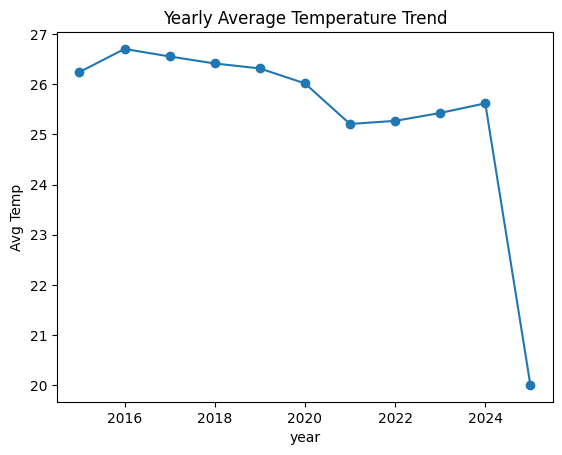

In [51]:
df['year'] = df['date_of_record'].dt.year
year_temp = df.groupby('year')['avg_temp'].mean()

year_temp.plot(marker='o')
plt.title("Yearly Average Temperature Trend")
plt.ylabel("Avg Temp")
plt.show()

# Yearly Rainfall Trend

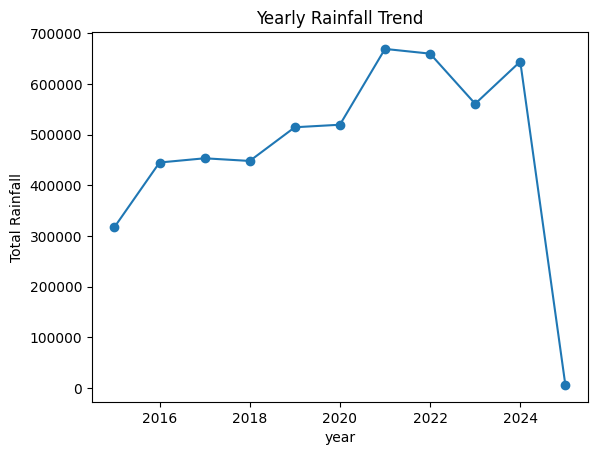

In [52]:
year_rainfall = df.groupby('year')['rainfall'].sum()
year_rainfall.plot(marker='o')
plt.title("Yearly Rainfall Trend")
plt.ylabel("Total Rainfall")
plt.show()

# ---------------------------------------
# 8. EXTREME WEATHER DETECTION
# ---------------------------------------

# i Cold Waves (3+ days min_temp < 10°C)

In [53]:
df['coldwave'] = df['min_temp'] < 10
df['cw_group'] = (df['coldwave'] != df['coldwave'].shift()).cumsum()

coldwaves = df[df['coldwave']].groupby('cw_group')['date_of_record'].agg(['min','max','count'])
coldwaves = coldwaves[coldwaves['count'] >= 3]

print("❄ Cold Wave Periods (3+ days < 10°C):")
print(coldwaves)

❄ Cold Wave Periods (3+ days < 10°C):
                min        max  count
cw_group                             
206      2015-01-10 2015-01-10      3
210      2015-01-10 2015-01-10      3
212      2015-01-10 2015-01-10      3
312      2015-01-13 2015-01-13      3
320      2015-01-13 2015-01-13      3
...             ...        ...    ...
96908    2025-02-10 2025-02-10      3
96910    2025-02-10 2025-02-10      4
96920    2025-02-10 2025-02-10      4
96924    2025-02-10 2025-02-10      3
96938    2025-02-10 2025-02-10      5

[2664 rows x 3 columns]


# ii Heavy Rainfall Days (> 100 mm)

In [55]:
print(df[df['rainfall'] > 100][['date_of_record','station_name','rainfall']])

       date_of_record          station_name  rainfall
11761      2015-04-05                 Jammu     110.0
381543     2015-04-06              Agartala     103.1
762049     2015-04-16                Madras     103.1
765743     2015-04-16  Madras / Minambakkam     103.1
900714     2015-04-22    Thiruvananthapuram     161.0
...               ...                   ...       ...
803948     2024-12-03             Kozhikode     156.0
856417     2024-12-13              Karaikal     202.9
769272     2024-12-13  Madras / Minambakkam     105.9
839780     2024-12-16            Port Blair     117.1
648463     2024-12-20                  Tuni     122.4

[2796 rows x 3 columns]


# iii Cyclone-like Low Pressure (< 990 hPa)

In [54]:
print(df[df['air_pressure'] < 990][['date_of_record','station_name','air_pressure']])

       date_of_record          station_name  air_pressure
897201     2015-10-20    Thiruvananthapuram         963.4
900895     2015-10-20    Thiruvananthapuram         963.4
897530     2016-09-13    Thiruvananthapuram         969.5
901224     2016-09-13    Thiruvananthapuram         969.5
901306     2016-12-04    Thiruvananthapuram         974.4
897612     2016-12-04    Thiruvananthapuram         974.4
901333     2016-12-31    Thiruvananthapuram         969.3
897639     2016-12-31    Thiruvananthapuram         969.3
20072      2017-01-27              Amritsar         978.8
469053     2017-07-30       Nagpur Sonegaon         965.0
465363     2017-07-30  Nagpur Mayo Hospital         965.0
465364     2017-07-31  Nagpur Mayo Hospital         922.6
469054     2017-07-31       Nagpur Sonegaon         922.6
901551     2017-08-06    Thiruvananthapuram         967.2
897857     2017-08-06    Thiruvananthapuram         967.2
897952     2017-11-09    Thiruvananthapuram         967.8
901646     201

# ---------------------------------------
# 9. CORRELATION INSIGHTS
# ---------------------------------------

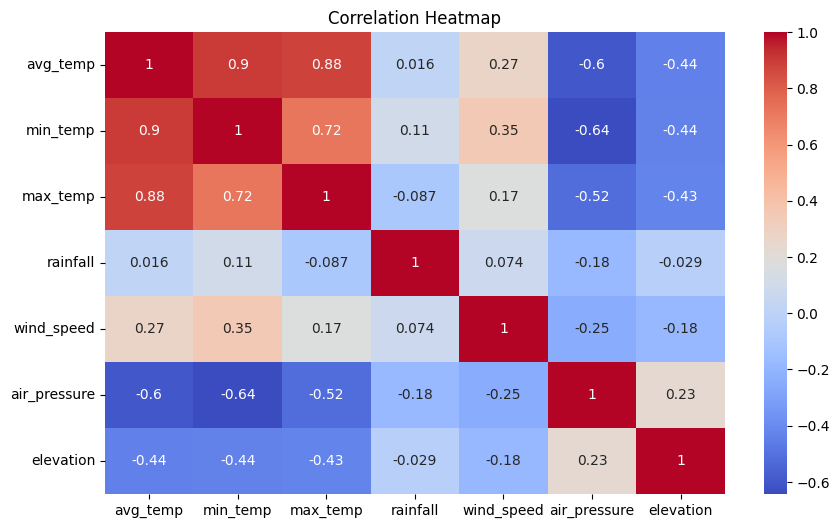

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['avg_temp','min_temp','max_temp','rainfall','wind_speed','air_pressure','elevation']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------
# 10. STATION-LEVEL INSIGHTS
# ---------------------------------------

In [57]:
station_summary = df.groupby('station_name')[['avg_temp','rainfall','wind_speed','air_pressure']].mean()
print(station_summary.head())

                     avg_temp   rainfall  wind_speed  air_pressure
station_name                                                      
Agartala            26.023389   7.837584    5.107042   1008.778538
Agatti / Kavaratti  28.326846   4.599597   17.604161   1009.812550
Agra                24.925323   2.357449    5.971506   1008.417564
Agumbe              22.577548  11.448347    8.169559   1010.917906
Ahmadabad           27.903769   4.826963    7.929868   1008.417813


In [58]:
station_summary.to_csv("station_summary.csv")
monthly_temp.to_csv("monthly_temp.csv")